# Matplotlib를 이용한 데이터 시각화 
 - 데이터의 값 자체를 살펴보기보다는 이를 그래프나 차트 형태로 그려보는 것이 큰 도움이 될 때가 많다.  전체적인 추세를 확인
 

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (5, 4)

## 1. Simple Graph 

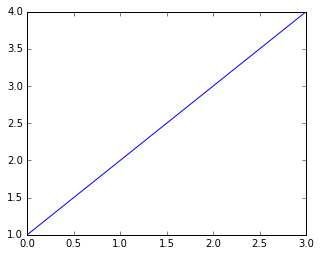

In [6]:
plt.plot([1, 2, 3, 4])

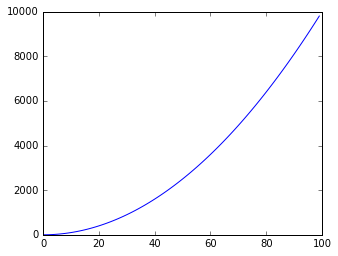

In [8]:
x = range(0,100)
y = [v*v for v in x]
plt.plot(x,y)

In [12]:
y = []
for v in x:
    y.append(v*v)

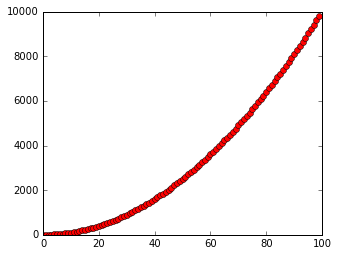

In [14]:
plt.plot(x, y, 'ro')

## 2. Figures and Subplots

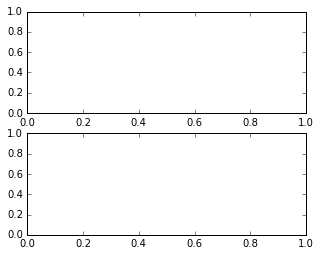

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

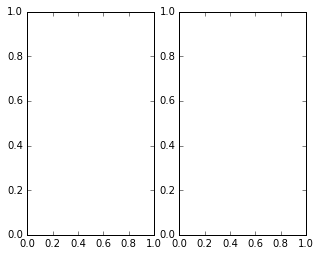

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.show()

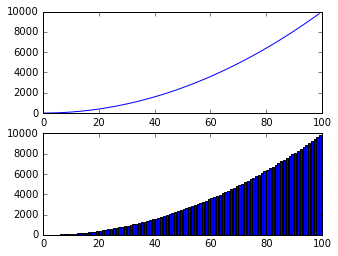

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(x,y)
ax2.bar(x,y)
plt.show()

In [20]:
import numpy as np

In [21]:
t = np.arange(0.0,5.0,0.1)
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

In [23]:
np.pi

3.141592653589793

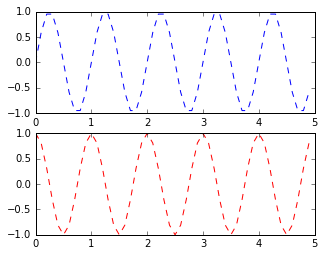

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(t,np.sin(2*np.pi*t),'b--')
ax2.plot(t, np.cos(2*np.pi*t), 'r--')

## 3. 라벨 및 범례 표시하기

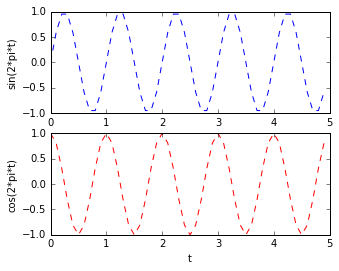

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(t,np.sin(2*np.pi*t),'b--')
ax2.plot(t, np.cos(2*np.pi*t), 'r--')
ax1.set_xlabel('t')
ax1.set_ylabel('sin(2*pi*t)')
ax2.set_xlabel('t')
ax2.set_ylabel('cos(2*pi*t)')

In [27]:
import pandas_datareader.data as web
lg = web.DataReader("066570.KS", "yahoo")
samsung = web.DataReader("005930.KS", "yahoo")

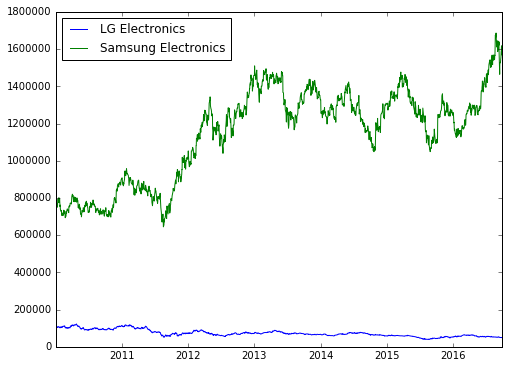

In [31]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(lg.index, lg['Adj Close'], label='LG Electronics')
plt.plot(samsung.index, samsung['Adj Close'], label='Samsung Electronics')
plt.legend(loc='upper left')

## 4. Matplotlib 구성
![구성](stock/3.PNG)

In [38]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

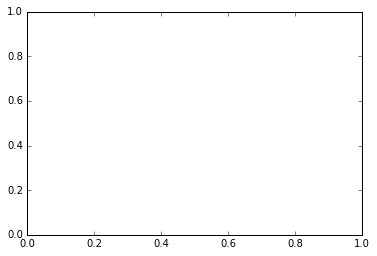

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211711139E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021170BF87F0>]], dtype=object)

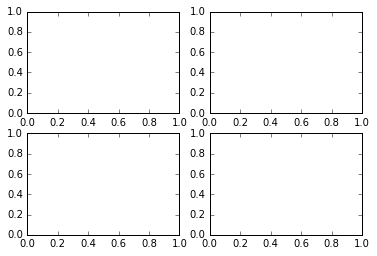

In [42]:
fig, ax_list = plt.subplots(2, 2)
fig
ax_list

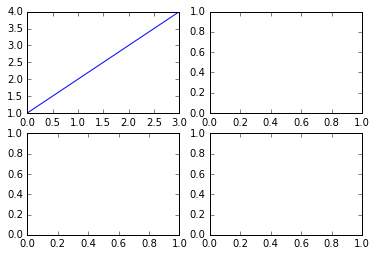

In [44]:
fig, ax_list = plt.subplots(2, 2)
ax_list[0][0].plot([1, 2, 3, 4])

## 5. 다양한 그래프 그리기
### 1) 수정 종가와 거래량 한번에 그리기

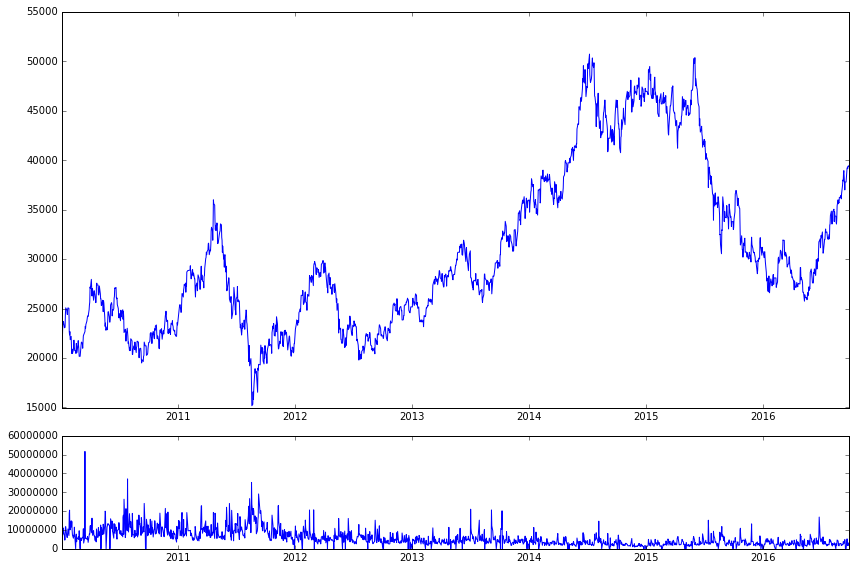

In [45]:
sk_hynix = web.DataReader("000660.KS", "yahoo")
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
top_axes.plot(sk_hynix.index, sk_hynix['Adj Close'], label='Adjusted Close')
bottom_axes.plot(sk_hynix.index, sk_hynix['Volume'])
plt.tight_layout()

 - Step 1

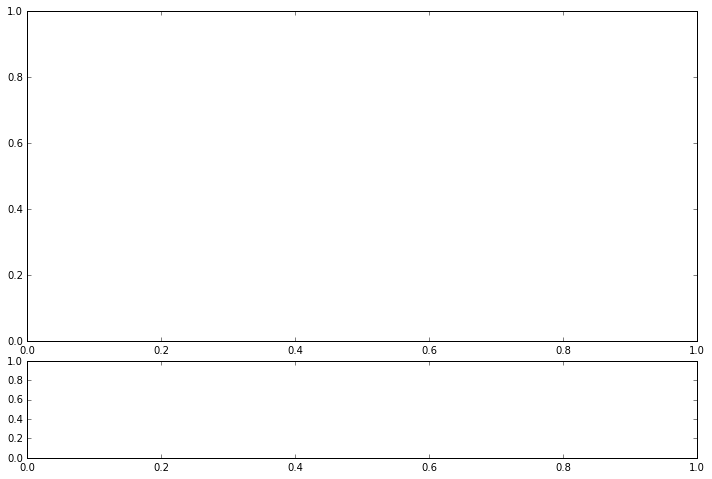

In [56]:
fig = plt.figure(figsize=(12, 8))
top_axes = plt.subplot2grid((4,4),(0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4),(3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()

 - subplot2grid( )는 subplot의 위치나 크기를 조절하고자 할 때 사용 
  - subplot2grid( ) 함수인자에서 첫 번째 인자인 (4, 4)는 grid의 모양을 의미하는 것으로 4x4 grid를 의미
  - 두번째 인자인 (0, 0)은 4x4 grid에서 첫 번째 grid를 의미합니다. 세 번째 인자인 rowspan=3은 (0, 0) grid가 행 방향으로 3개만큼 걸치는 것을 의미
  - 네 번째 인자인 colspan=4는 (0, 0) grid가 열 방향으로 4개만큼 걸치는 것을 의미

![subplot2grid](stock/4.PNG)
 - 생성된 AxesSubplot에 plot( ) 함수를 통해 그래프를 그릴 수 있습니다. 이때 거래량 그래프가 출력되는 bottom_axes라는 AxesSubplot 객체에는 추가로 다음과 같은 설정을 했습니다. 이는 거래량 값으로 큰 값이 발생할 때 그 값을 오일러 상수 (e)의 지수 형태로 표현되지 않도록 하는 설정입니다
 - tight_layout() : subplot들이 Figure 객체이 영역 내에서 자동으로 최대 크기로 출력

### 2) 캔들 스틱 차트 그리기
![킨들차트](stock/5.PNG)

- Matplotlib에서 캔들 스틱 차트를 그리는 함수 이름도 candle로 시작하지만, 국내에서는 캔들보다는 봉 차트라는 용어를 더 많이들 사용하고 있습니다.
- 기본 단위인 ‘일봉’은 거래일 동안의 시가 (장시작 가격), 고가 (장중 최고가), 저가 (장중 최저가), 종가 (장마감 가격)의 네 가지 값을 한 개의 봉으로 표현 
 - 일봉 중 종가가 시가보다 높은 경우를 양봉
 - 반대로 종가가 시가보다 낮은 경우을 음봉
- 주가가 약세시점에서 양봉 3개가 나타나는 것을 ‘적삼병’이라고 부르고 이를 주가 상승 장세의 시점으로 봅니다. 반대로 주가가 상승 시점에 있다가 음봉 3개가 연달아서 나타나면 이를 ‘흑삼병’이라고 부르고 주가가 하락세로 전환되거나 하락세가 지속될 시점으로 판단

![양음봉](stock/6.PNG)

In [83]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.finance as matfin
import pandas as pd
%matplotlib inline

In [77]:
start = datetime.datetime(2016,3,1)
end = datetime.datetime(2016,3,31)

In [80]:
skhynix = web.DataReader("000660.KS","yahoo",start,end)
skhynix.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,30000.0,30000.0,30000.0,30000.0,0,30000.0
2016-03-02,31050.0,31300.0,30650.0,30950.0,3567300,30950.0
2016-03-03,31550.0,32000.0,31100.0,31950.0,3898300,31950.0
2016-03-04,31800.0,32100.0,31550.0,31900.0,1913300,31900.0
2016-03-07,32150.0,32250.0,31500.0,31900.0,3487200,31900.0


(<matplotlib.collections.LineCollection at 0x211723de2e8>,
 <matplotlib.collections.PolyCollection at 0x211723de438>)

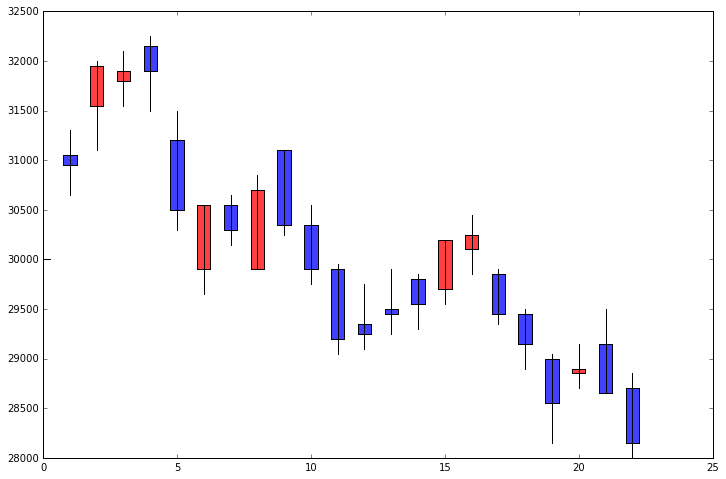

In [81]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
matfin.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], skhynix['Low'], skhynix['Close'], width=0.5, colorup='r', colordown='b')

In [92]:
skhynix = skhynix[skhynix['Volume'] > 0]
skhynix['MA5'] = pd.rolling_mean(skhynix['Adj Close'], 5)
skhynix['MA20'] = pd.rolling_mean(skhynix['Adj Close'], 20)
skhynix['MA60'] = pd.rolling_mean(skhynix['Adj Close'], 60)
skhynix['MA120'] = pd.rolling_mean(skhynix['Adj Close'], 120)
skhynix.tail()

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
  from ipykernel import kernelapp as app
C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  app.launch_new_instance()
C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=120).mean()


,Open,High,Low,Close,Volume,Adj Close,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2016-03-25,29450.0,29500.0,28900.0,29150.0,1978900,29150.0,29720.0,NaN,NaN,NaN
2016-03-28,29000.0,29050.0,28150.0,28550.0,2795400,28550.0,29520.0,NaN,NaN,NaN
2016-03-29,28850.0,29150.0,28700.0,28900.0,2343800,28900.0,29260.0,30147.5,NaN,NaN
2016-03-30,29150.0,29500.0,28650.0,28650.0,3512800,28650.0,28940.0,30032.5,NaN,NaN
2016-03-31,28700.0,28850.0,28000.0,28150.0,4336500,28150.0,28680.0,29842.5,NaN,NaN
